In [1]:
# coding: utf8
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

%matplotlib inline

In [2]:
X, y = datasets.load_digits(10, True)
X_trn, X_val, y_trn, y_val = train_test_split(X, y)

先设置一个较大的`n_estimators`

In [3]:
rf = RandomForestClassifier(500)
rf.fit(X_trn, y_trn)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

获取每个子树的预测结果

In [4]:
predictions = []
for t in rf.estimators_:
    predictions.append(t.predict_proba(X_val))
predictions = np.array(predictions)

In [5]:
predictions.shape

(500, 450, 10)

In [6]:
predictions = predictions.cumsum(axis=0) / np.arange(1, predictions.shape[0] + 1)[:, np.newaxis, np.newaxis]

计算使用第1~第k棵数集成的score

In [7]:
score = []
for pred_proba in predictions:
    score.append(accuracy_score(y_val, np.argmax(pred_proba, axis=1)))

画出`n_estimators`和`score`的关系图，发现100棵树差不多就够了

Text(0,0.5,'score')

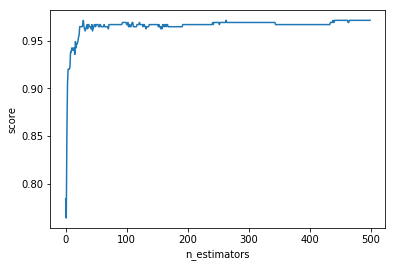

In [8]:
plt.plot(score)
plt.xlabel('n_estimators')
plt.ylabel('score')